In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import scipy.stats as st

In [4]:
#data files
mouse_metadata=pd.read_csv(r"C:\Users\alexi\UCI-VIRT-DATA-PT-10-2022-U-LOLC\01-Lesson-Plans\01-Excel\1\UCI-VIRT-DATA-PT-10-2022-U-LOLC\02-Homework\05-Matplotlib\Starter_Code\Pymaceuticals\data\Mouse_metadata.csv")
study_results=pd.read_csv(r"C:\Users\alexi\UCI-VIRT-DATA-PT-10-2022-U-LOLC\01-Lesson-Plans\01-Excel\1\UCI-VIRT-DATA-PT-10-2022-U-LOLC\02-Homework\05-Matplotlib\Starter_Code\Pymaceuticals\data\Study_results.csv")

#combine mouse and study data
combine_d=pd.merge(mouse_metadata, study_results, how='right')

combine_d.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [5]:
#Preparing the Data

#number of mice ID's before clean up
mouses=combine_d["Mouse ID"].value_counts()
total_mouses=len(mouses)
total_mouses

249

In [6]:
#Check for any duplicates
dup_id_time=combine_d.loc[combine_d.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
dup_id_time

array(['g989'], dtype=object)

In [7]:
#show a display of the data pertaining to duplicate
dup_id_df=combine_d.loc[combine_d["Mouse ID"] =="g989", :]
dup_id_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
#drop duplicate mouse and clean df
clean=combine_d[combine_d['Mouse ID'].isin(dup_id_time)==False]
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [9]:
#Number of mice in the clean df
c_total=clean["Mouse ID"].value_counts()
clean_total=len(c_total)
clean_total

248

In [10]:
#Summary Statistics
#drug regimen mean, median, variance, std, SEM

drug_mean=clean.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
drug_median=clean.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
drug_var=clean.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
drug_std=clean.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
drug_sem=clean.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]

drug_table=pd.DataFrame({"Tumor Volume Mean":drug_mean,
                        "Tumor Volume Median":drug_median,
                        "Tumor Volume variance": drug_var,
                        "Tumor Volume Std. Dev": drug_std,
                        "Tumor Volume Std. Error": drug_sem})
drug_table


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume variance,Tumor Volume Std. Dev,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


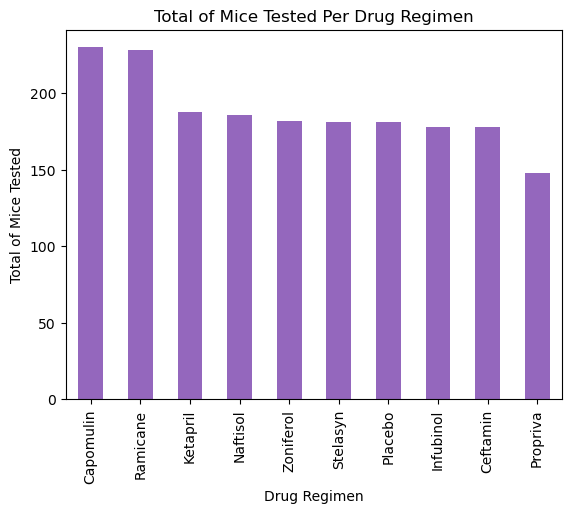

In [11]:
#2 bar charts: 1 with pd.df and another with pyplot method
#show the total number of time points for all mice tested for each drug regimen throughout the study.

count=clean["Drug Regimen"].value_counts()

panda_bar=count.plot.bar(color='tab:purple')

#set up the axis and title
plt.xlabel("Drug Regimen")
plt.ylabel("Total of Mice Tested")
plt.title("Total of Mice Tested Per Drug Regimen")

plt.show()

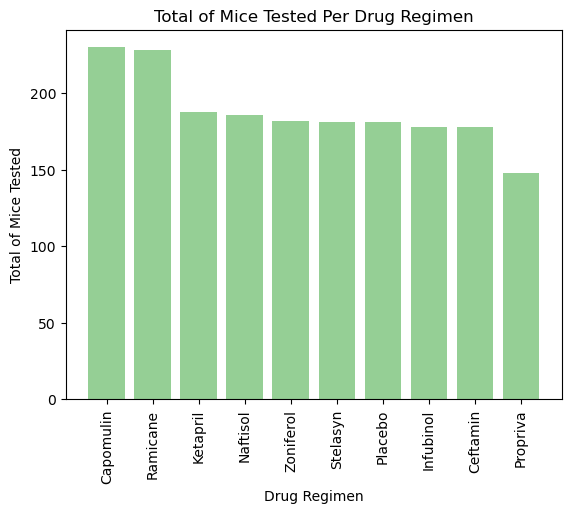

In [12]:
#bar chart using matplotlib
x=count.index.values
y=count.values

plt.bar(x, y, color='tab:green', alpha=0.5, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("Total of Mice Tested")
plt.xticks(rotation="vertical")
plt.title("Total of Mice Tested Per Drug Regimen")

plt.show()

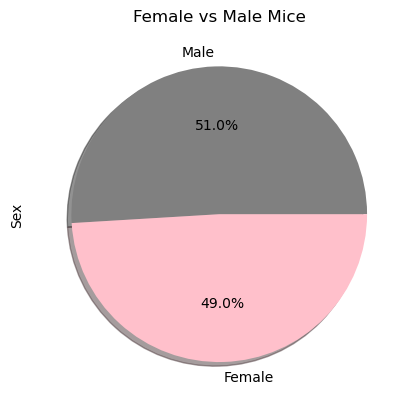

In [15]:
#2 pie chart of the distribution of femal vs male mice in study
# 1 using panda df and the other using maplotlib method

gender=clean["Sex"].value_counts()
colors=['grey', 'pink']
gender.plot.pie(autopct="%1.1f%%", colors = colors, shadow=True)
plt.title("Female vs Male Mice")
plt.show()

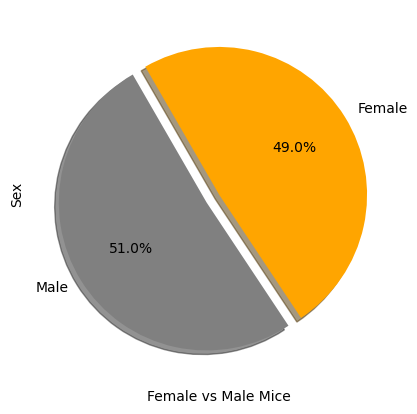

In [16]:
#pie chart using matplotlib
labels=['Male', 'Female']
sizes=[51 , 49]
explode=(0.1,0)
colors=['grey', 'orange']
plt.ylabel('Sex')
plt.xlabel("Female vs Male Mice")
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", startangle=120, shadow=True)
plt.show()

In [17]:
#Quartiles, Outliers, and boxplots
#calculate final tumor volume of each mousr for Capumulin, ramicane, Infubinol, and Ceftamin
#calcuate quartiles, IQR and if there are any outliers of the four- generate a boxplot of final tumor volume distribution
#highlight poetnetial outliers in plot with color and style

#last time point of each mouse
time=clean.groupby(['Mouse ID'])
last_timepoint_each_ID=time['Timepoint'].max()
pd.DataFrame(last_timepoint_each_ID)

last_timepoint_each_ID


Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [18]:
#list regimens for loop
drugs=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#merge last timepoing of each mouse df to the clean version
last_merge=pd.merge(clean,last_timepoint_each_ID, how="right", on=["Mouse ID", "Timepoint"])
last_merge

#list for tumor vol for plotting later
volume=[]

In [19]:
#setting loop to calcualte the outliers and quartiles
for drugs in drugs:
    spec_mice_per_drug=last_merge.loc[last_merge['Drug Regimen']==drugs, 'Tumor Volume (mm3)' ]
    volume.append(spec_mice_per_drug)
    
    #setting bounds, quartiles, and iqr
    quart=spec_mice_per_drug.quantile([.25,.5,.75])
    low_quart=quart[0.25]
    high_quart=quart[0.75]
    iqr=high_quart-low_quart
    
    print(f"The Tumor Volume (mm3) lower quartile is: {low_quart}")
    print(f"The Tumor Volume (mm3) upper quartile is: {high_quart}")
    print(f"The Tumor Volume (mm3) interquartile is: {iqr}")
    print(f"The Tumor Volume (mm3) median is: {quart[0.5]}")

    #possible outliers
    low_outliers= low_quart - (1.5*iqr)
    high_outliers= high_quart + (1.5*iqr)

    print(f"The values below {low_outliers} could be outliers")
    print(f"The values above {high_outliers} could be outliers")
    
#Tumor volume (mm3) 1-6 is Capomulin
#Tumor volume (mm3) 7-12 is Ramicane
#Tumor volume (mm3) 13-18 is Infubinol
#Tumor volume (mm3) 19-24 is Ceftamin

The Tumor Volume (mm3) lower quartile is: 32.37735684
The Tumor Volume (mm3) upper quartile is: 40.1592203
The Tumor Volume (mm3) interquartile is: 7.781863460000004
The Tumor Volume (mm3) median is: 38.1251644
The values below 20.70456164999999 could be outliers
The values above 51.83201549 could be outliers
The Tumor Volume (mm3) lower quartile is: 31.56046955
The Tumor Volume (mm3) upper quartile is: 40.65900627
The Tumor Volume (mm3) interquartile is: 9.098536719999998
The Tumor Volume (mm3) median is: 36.56165229
The values below 17.912664470000003 could be outliers
The values above 54.30681135 could be outliers
The Tumor Volume (mm3) lower quartile is: 54.04860769
The Tumor Volume (mm3) upper quartile is: 65.52574285
The Tumor Volume (mm3) interquartile is: 11.477135160000003
The Tumor Volume (mm3) median is: 60.16518046
The values below 36.83290494999999 could be outliers
The values above 82.74144559000001 could be outliers
The Tumor Volume (mm3) lower quartile is: 48.72207785
T

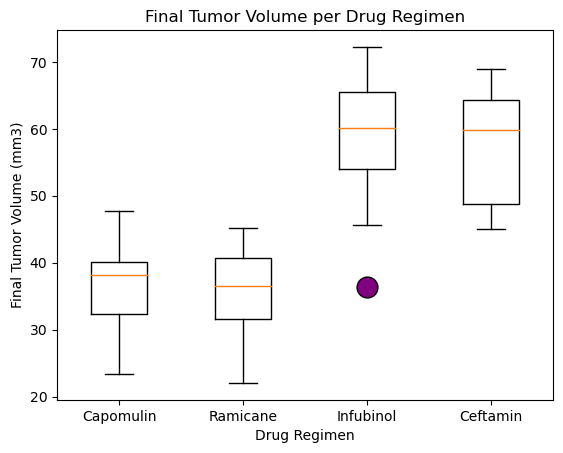

In [34]:
#setting boxplot of the drugs from previous
fig1, axi=plt.subplots()
axi.set_xlabel('Drug Regimen')
axi.set_ylabel('Final Tumor Volume (mm3)')
axi.set_title('Final Tumor Volume per Drug Regimen')
purple=dict(markerfacecolor="purple",markersize=15)
axi.boxplot(volume,labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'], flierprops= purple)
plt.show()

#outlier is marked with a purple circle

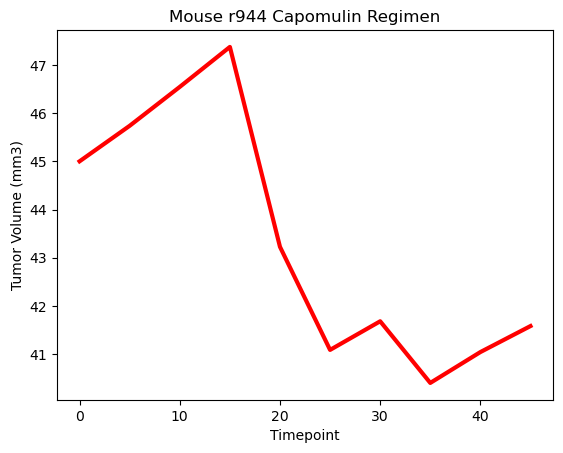

In [21]:
#line Plot and Scatter plot
#line plot will show tumor volume vs timepoint for one mouse treated with Capomulin
#will use Mouse ID, r944

capo_df=clean.loc[clean["Drug Regimen"]=="Capomulin",:]
line_df=capo_df.loc[capo_df["Mouse ID"]=="r944",:]
x_label=line_df["Timepoint"]
y_label=line_df["Tumor Volume (mm3)"]
plt.title('Mouse r944 Capomulin Regimen')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x_label, y_label,color="red", linewidth=3)
plt.show()

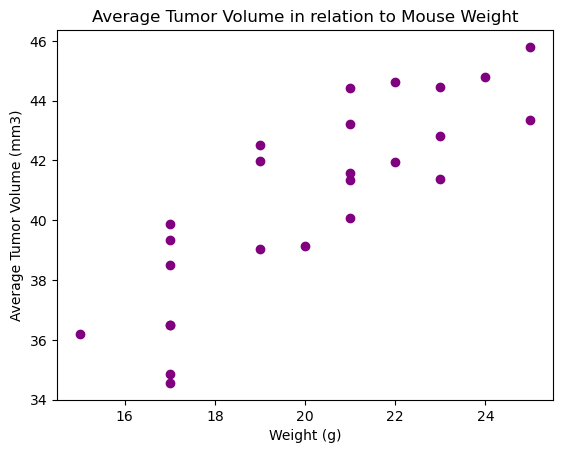

In [22]:
#scatter plot will show average tumor vol vs. mouse weight for Capomulin
capo_mean=capo_df.groupby(['Mouse ID']).mean()
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume in relation to Mouse Weight')
plt.scatter(capo_mean['Weight (g)'], capo_mean['Tumor Volume (mm3)'], color="purple")
plt.show()

In [26]:
#Correlation for mouse weight and average tumor volume for Capomulin regimen
corr=st.pearsonr(capo_mean['Weight (g)'], capo_mean['Tumor Volume (mm3)'])
print(f"The correlation value of weight (g) and the average tumor volume (mm3) is {round(corr[0],4)}")

The correlation value of weight (g) and the average tumor volume (mm3) is 0.8419


In [42]:
#Regression for mouse weight and average tumor volume for Capomulin regimen
x_axis=capo_mean['Weight (g)']
y_axis=capo_mean['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr)= st.linregress(x_axis, y_axis)
regression=x_axis*slope+intercept

pr_regression="y="+str(round(slope,4)) + "x+"+ str(round(intercept,4))

print(f"Slope:{slope}")
print(f"Y-intercept:{intercept}")
print(f"P-Value:{pvalue}")
print(f"R-Value:{rvalue}")
print(f"Standard Error: {stderr}")
      
print(pr_regression)

print(f"R-squared:{rvalue**2}")

Slope:0.9544396890241049
Y-intercept:21.552160532685008
P-Value:1.3225722434712404e-07
R-Value:0.8419363424694721
Standard Error: 0.12754359033201323
y=0.9544x+21.5522
R-squared:(0.7088568047708723, 4)


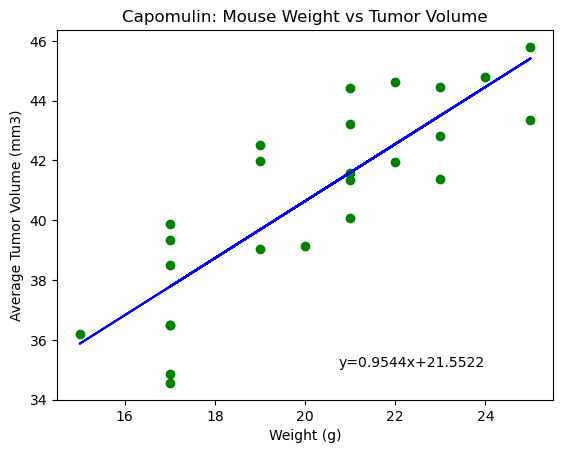

In [50]:
#Plotting Linear regression of weight vs average tumor volume
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Mouse Weight vs Tumor Volume")
plt.scatter(x_axis, y_axis, color="green")
plt.plot(x_axis, regression, "b-")
plt.annotate(pr_regression,xy=(24,35), horizontalalignment='right', verticalalignment='bottom')
plt.show()